In [82]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [83]:
def stratified_sampling(labeldir='/Users/elior/Desktop/DL Project Code/ILSVRC2012_devkit_t12/data/ILSVRC2012_validation_ground_truth.txt',
                        imagedir='/Users/elior/Desktop/DL Project Code/ILSVRC2012_img_val',
                        pct: float = 0.02,
                        ) -> pd.DataFrame:
    """
    Helper function to sample the ILSVRC2012_img_val dataset in a stratified method.
    Parameters
    ----------
    labeldir
        Path to the 'ILSVRC2012_validation_ground_truth.txt' file.
    imagedir
        Path to the 'ILSVRC2012_img_val' folder.
    pct
        Percentage of (image title, label) pairs that are kept in the sampling process compared to the initial entire dataset.
    Returns
    -------
    pd.DataFrame
        A DataFrame of the sampled Image titles and their corresponding label.
    """
    # Collect every class label for each image
    with open(labeldir, 'r') as f:
        labels = f.read().splitlines()
    
    # Gather all image titles
    image_titles = os.listdir(imagedir)
    image_titles.sort()
    
    # Create a Dataframe with the image titles and labels
    merge_dict = {'images':image_titles, 'labels':labels}
    df = pd.DataFrame(merge_dict)
    
    # Return a stratified sample of the dataset
    return df.groupby('labels', group_keys=False).apply(lambda x: x.sample(frac=pct, replace=False))


Sampled Dataset Size: 10000

First five rows:
                              images labels
17443  ILSVRC2012_val_00017444.JPEG      1
27841  ILSVRC2012_val_00027842.JPEG      1
39453  ILSVRC2012_val_00039454.JPEG      1
42459  ILSVRC2012_val_00042460.JPEG      1
43218  ILSVRC2012_val_00043219.JPEG      1

Last five rows:
                              images labels
29777  ILSVRC2012_val_00029778.JPEG    999
17656  ILSVRC2012_val_00017657.JPEG    999
9607   ILSVRC2012_val_00009608.JPEG    999
17779  ILSVRC2012_val_00017780.JPEG    999
26782  ILSVRC2012_val_00026783.JPEG    999


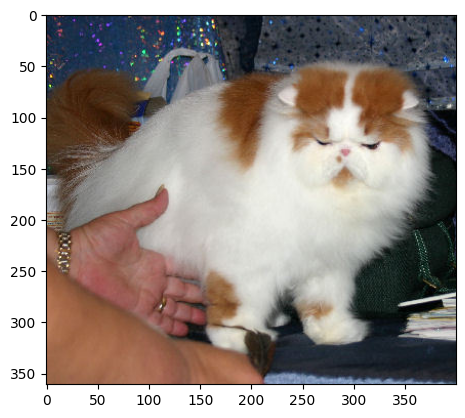

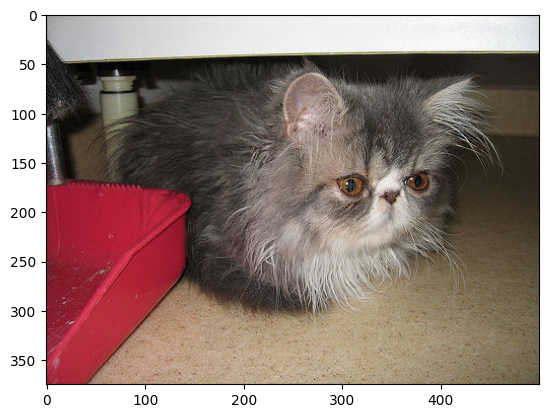

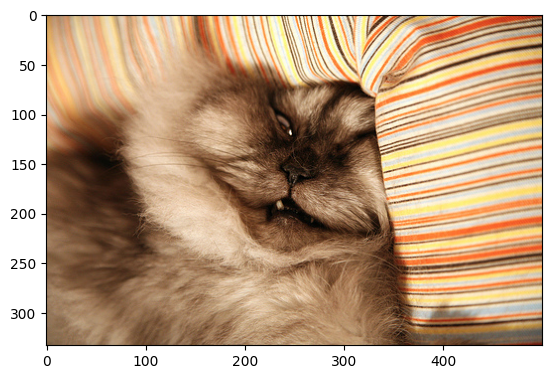

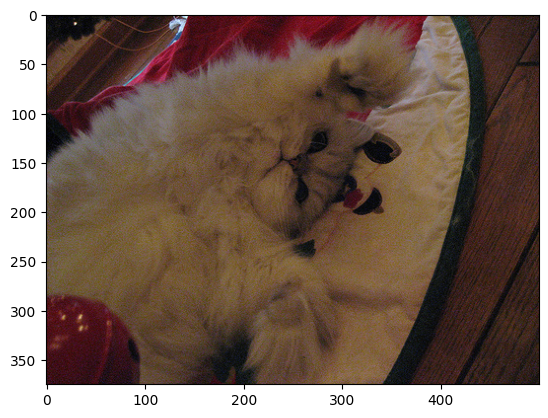

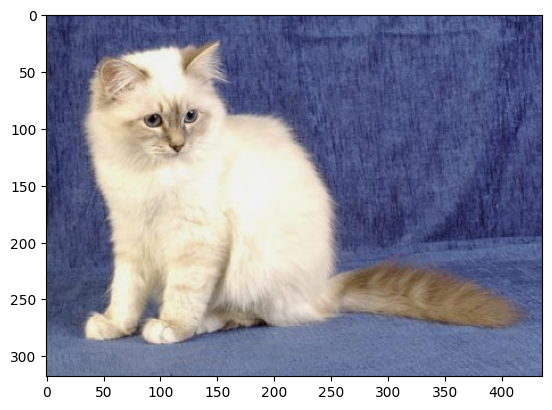

In [84]:
# Create the subset and display info
subset = stratified_sampling(pct=0.2)

print('Sampled Dataset Size: {}'.format(subset.shape[0]))
print('\nFirst five rows:\n', subset.head())
print('\nLast five rows:\n', subset.tail())

# Display first 5 images that have the 10th class label
indices = subset.index[subset['labels']=='10'][:5]
imagedir = '/Users/elior/Desktop/DL Project Code/ILSVRC2012_img_val'

for idx in indices:
    filename = subset.loc[idx].at['images']
    img_path = os.path.join(imagedir, filename)

    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.show()